In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import keras
from keras.layers import Dense, Activation
from keras.models import Sequential

In [2]:
# reading the dataset
dia = pd.read_csv('Data/Diamond Price Prediction.csv')
dia.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
dia.shape

(53940, 11)

In [14]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int32  
 2   color    53940 non-null  int32  
 3   clarity  53940 non-null  int32  
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int32(3), int64(1)
memory usage: 3.5 MB


In [4]:
# removing unnecessary columns
dia=dia.iloc[:,1:]
dia.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
# checking for 
dia.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
# no null values to be treated

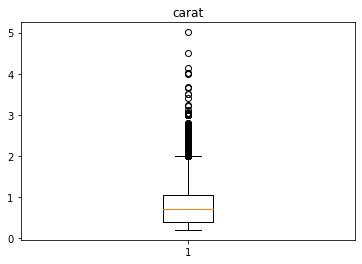

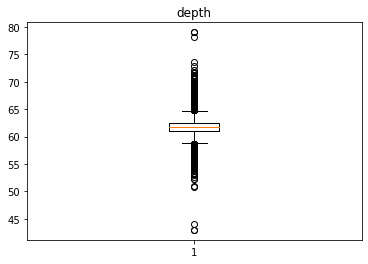

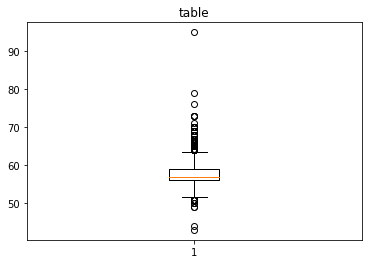

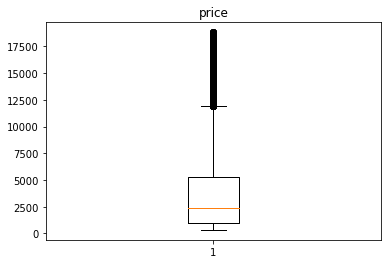

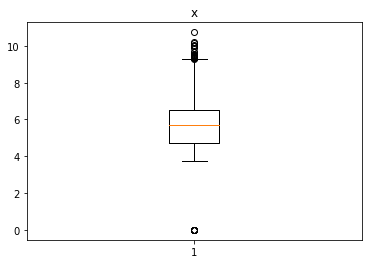

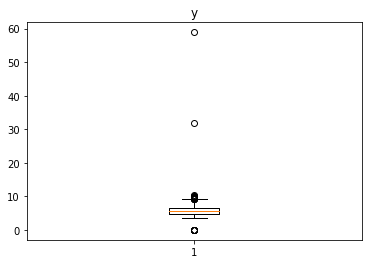

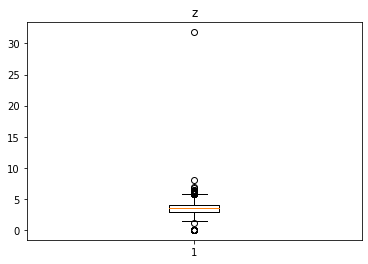

In [7]:
# chceking for outliers  with help of box plots
dia.columns

for i in ['carat', 'depth', 'table', 'price', 'x', 'y','z']:
    
    plt.boxplot(dia[i])
    plt.title(i)
    plt.show();

In [8]:
# leaving in outliers as is for first iteration

In [9]:
# labelencoding 
lb=LabelEncoder()

for i in  ['cut', 'color', 'clarity']:
    dia[i]=lb.fit_transform(dia[i])

In [10]:
dia.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [11]:
# X,y spliting
X=dia.drop('price',axis =1)
y=dia.price

In [12]:
#Strandardization
ss=StandardScaler()
X=ss.fit_transform(X)

In [15]:
#train _test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
# choosing maxdepth for RandomForestRegressor
for i in range(1,25):
    rfc=RandomForestRegressor(max_depth=i)
    rfc.fit(X_train,y_train)
    pred = rfc.predict(X_test)
    r2_score(y_test, pred)
    print(f'{i}    {r2_score(y_test, pred)}')

1    0.6056400416640608
2    0.8317311376371919
3    0.8858676445370507
4    0.9152485469420684
5    0.9372043021945897
6    0.955283153840892
7    0.9672351834326208
8    0.9734825425001999
9    0.9771985044169752
10    0.979494933128218
11    0.9804510402661327
12    0.9809979789732286
13    0.9811783723734385
14    0.9813174519856639
15    0.9814507434986673
16    0.9815546406333102
17    0.9812757039212943
18    0.9812867954222464
19    0.9813222986385872
20    0.9813901999055993
21    0.981359887657709
22    0.9812795580553496
23    0.9812060328571313
24    0.9811762574489044


In [ ]:
# max score seems to be at max depth =16

In [20]:
# choosing best max depth for DecisionTreeRegressor
for i in range(1,20):
    dtc=DecisionTreeRegressor(max_depth=i)
    dtc.fit(X_train,y_train)
    pred = dtc.predict(X_test)
    print(f'{i}    {r2_score(y_test, pred)}')

1    0.6030630804864652
2    0.8302082754717783
3    0.8838458713183126
4    0.9083408835080186
5    0.9308319022892628
6    0.9457830276435146
7    0.9600510332797784
8    0.9675293816033507
9    0.9714201863665805
10    0.9738368237176098
11    0.9751572054334425
12    0.9745136909610302
13    0.9734377932334557
14    0.9723634860549165
15    0.9708196571742463
16    0.9693499377570114
17    0.9678991498025853
18    0.9672531713777199
19    0.9672043872328453


In [ ]:
# max score seems to be at max depth =16

In [16]:
#linear regression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
r2_score(y_test,pred)

0.8863641648837631

In [22]:
#Decision tree regression
dfr=DecisionTreeRegressor(max_depth=16)
dfr.fit(X_train,y_train)
pred = dfr.predict(X_test)
r2_score(y_test,pred)

0.9699829906157367

In [23]:
#RandomForestRegressor
rfc=RandomForestRegressor(max_depth=16)
rfc.fit(X_train,y_train)
pred = rfc.predict(X_test)
r2_score(y_test,pred)

0.981490796891381

In [ ]:
#choosing the random forest regression methord for this problem as this gives the best accuracy ~98%

In [ ]:
# the accuracy is higher than the required accuracy of 85%

In [ ]:
# successfully created a model based on requirements